<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Object_Detection_Persian_Digit_Detection/blob/main/1st_Final_Function_Dg_vs_NDg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Function:

In [ ]:
def dg_rec(path, model_path): 
  from keras.models import load_model
  model=load_model(model_path) 
  import cv2
  import matplotlib.pyplot as plt
  import numpy as np
  from skimage import filters
  from skimage.filters import threshold_otsu#, sobel
  from skimage.segmentation import clear_border
  from skimage.measure import label, regionprops
  from skimage.morphology import closing, square
  from skimage.color import label2rgb
  from tensorflow.keras.utils import img_to_array
  
  img=cv2.imread(path)
  image=cv2.imread(path)

  img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  blur = cv2.GaussianBlur(gray, (7,7), 1)

  thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,87,9)
  edge_sobel = filters.sobel(thresh)


  thresh = threshold_otsu(edge_sobel)
  bw = closing(edge_sobel > thresh, square(3))

  cleared=clear_border(bw)

  label_image=label(cleared)

  image_label_overlay = label2rgb(label_image, image=image, bg_label=0)
  image_boxs=[]
  image_slices=[]
  for region in regionprops(label_image):
      # take regions with large enough areas
      if region.area >= 100:
          # draw rectangle around segmented 
          minr, minc, maxr, maxc = region.bbox
          image_boxs.append([minc,minr, maxc,maxr])
          img=image[minr:maxr, minc:maxc]
          img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          image_slices.append(img)
  x_img=[]
  for image in image_slices:
    
    #some preprocessing commands:
    image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,87,9)
    image=cv2.resize(image,(32,32), interpolation=cv2.INTER_AREA)
    
    image=img_to_array(image)
    x_img.append(image)
    


  x_img=np.array(x_img,dtype='float')/255.0
  labels=model.predict(x_img)
  labels=labels.reshape(-1)
  labels=np.array(labels)
  dig_l=np.where(labels > .5, 1,0)

  input_image_path=path
  image=cv2.imread(input_image_path)
  orig=image

  i=0

  for img in x_img:
  
    if dig_l[i]==1:
      
      startX = image_boxs[i][0]
      startY = image_boxs[i][1]
      endX = image_boxs[i][2]
      endY = image_boxs[i][3]
      cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 3)
    i += 1

  
  fig , ax=plt.subplots(nrows=1,ncols=2,figsize=(13,26))
  ax[0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
  i=0

  for img in x_img:
  
    startX = image_boxs[i][0]
    startY = image_boxs[i][1]
    endX = image_boxs[i][2]
    endY = image_boxs[i][3]
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 3)
    i += 1

  ax[1].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))

  
  ax[0].set_title('Only Persian Digit Objects')
  ax[1].set_title('All Detected Objects')
  ax[0].axis('off')
  ax[1].axis('off')

#Examples:

In [ ]:
!unzip /content/tx_vs_ntx_clf_big2.zip

Archive:  /content/tx_vs_ntx_clf_big2.zip
   creating: tx_vs_ntx_clf_big2/
   creating: tx_vs_ntx_clf_big2/assets/
  inflating: tx_vs_ntx_clf_big2/keras_metadata.pb  
  inflating: tx_vs_ntx_clf_big2/saved_model.pb  
   creating: tx_vs_ntx_clf_big2/variables/
  inflating: tx_vs_ntx_clf_big2/variables/variables.data-00000-of-00001  
  inflating: tx_vs_ntx_clf_big2/variables/variables.index  


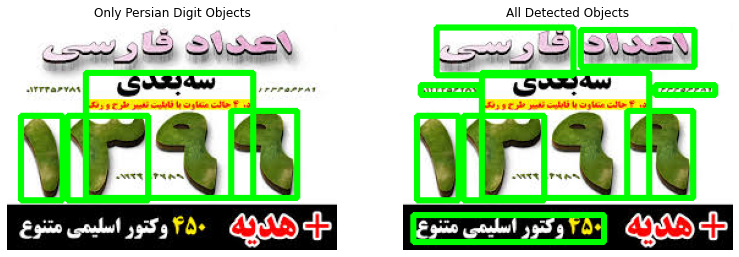

In [ ]:
path1='/content/images.jpg'
# model_path1='/content/tx_vs_ntx_clf_big2'
dg_rec(path1, model_path1)

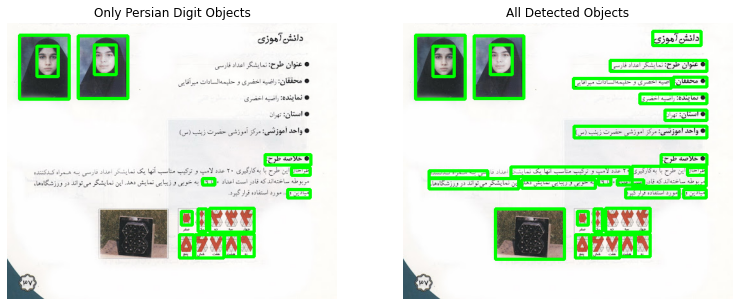

In [ ]:
path1='/content/unnamed (1).jpg'
# model_path1='/content/tx_vs_ntx_clf_big2'
dg_rec(path1, model_path1)